In [292]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


# Preparing the data
Before we build our model using machine learning algorithms, let's prepare our dataset. We will go through the following stages:

1. Importing the data

2. Selecting the feature matrix X and the target column y (supervised learning)

3. Encoding categorical features

4. Splitting the whole dataset into training and validation datasets

In [293]:
url = '/kaggle/input/playground-series-s4e2/train.csv'
train_df = pd.read_csv(url)
train_df.head() 

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [294]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [295]:
train_df.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

Data description

1.id: This column likely contains unique identifiers for each individual or data entry.

2. `Gender`: This column likely indicates the gender of each individual, possibly coded as categories like "Male" and "Female".
3. `Age`: This column likely represents the age of each individual, usually in years.
4. `Height`: This column likely represents the height of each individual, usually in centimeters or inches.
5. `Weight`: This column likely represents the weight of each individual, usually in kilograms or pounds.
6. `family_history_with_overweight`: This column might indicate whether an individual has a family history of overweight or obesity, possibly coded as "Yes" or "No".
7. `FAVC`: This column might indicate whether an individual consumes high-calorie food frequently, possibly coded as "Yes" or "No".
8. `FCVC`: This column might represent the frequency of consumption of vegetables by each individual.
9. `NCP`: This column might represent the number of main meals (breakfast, lunch, dinner) each individual consumes daily.
10. `CAEC`: This column might represent the consumption of food between meals by each individual, possibly coded as "Frequently", "Sometimes", "Always", etc.
11. `SMOKE`: This column might indicate whether an individual smokes tobacco, possibly coded as "Yes" or "No".
12. `CH2O`: This column might represent the daily water intake of each individual, usually in liters.
13. `SCC`: This column might indicate whether an individual monitors the calorie intake, possibly coded as "Yes" or "No".
14. `FAF`: This column might represent the physical activity frequency of each individual.
15. `TUE`: This column might represent the time spent sitting or using electronic devices per day.
16. `CALC`: This column might indicate whether an individual undertakes a daily caloric intake calculation, possibly coded as "Yes" or "No".
17. `MTRANS`: This column might represent the mode of transportation used by each individual, possibly coded as categories like "Car", "Public Transportation", "Walking", etc.
18. `NObeyesdad`: This column appears to be the target variable, indicating the weight status or classification of each individual (e.g., underweight, normal weight, overweight, obesity).

Without further context or a data description, these interpretations are based solely on the column names and common conventions in health-related datasets. It's always a good idea to consult the dataset documentation or the original source for detailed information about each column.

In [296]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [297]:
train_df.describe(exclude= 'number').T

,count,unique,top,freq
Gender,20758,2,Female,10422
family_history_with_overweight,20758,2,yes,17014
FAVC,20758,2,yes,18982
CAEC,20758,4,Sometimes,17529
SMOKE,20758,2,no,20513
SCC,20758,2,no,20071
CALC,20758,3,Sometimes,15066
MTRANS,20758,5,Public_Transportation,16687
NObeyesdad,20758,7,Obesity_Type_III,4046


# Data Cleaning

In [298]:
train_df2 = train_df.copy()

In [299]:
train_df2.duplicated().sum()

0

In [300]:
train_df2.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [301]:
train_df2.drop(columns = ['id'], inplace =True)

In [302]:
train_df2.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

# Exploratory Data Analysis

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [304]:
def density_plot(df, column):
    sns.kdeplot(data = train_df2, x= column)
    plt.title(f'Distribution of {column}')
    plt.show()
    
#density_plot(train_df2['Age'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


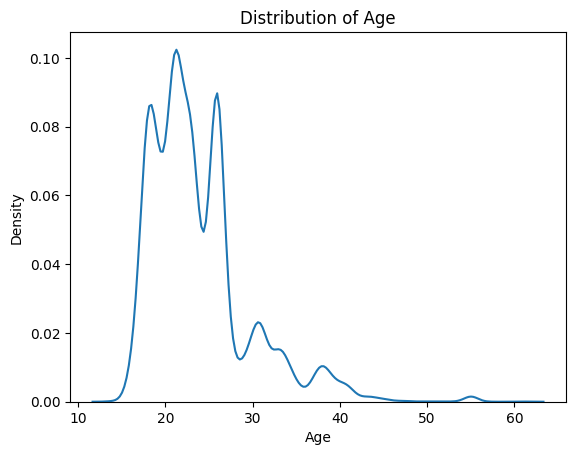

In [305]:
density_plot(train_df2, 'Age')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


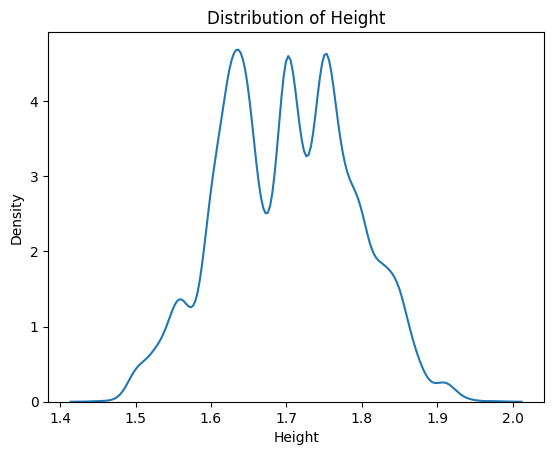

In [306]:
density_plot(train_df2, 'Height') 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


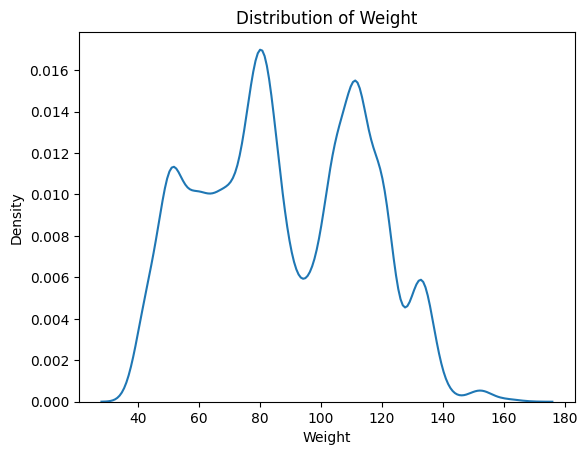

In [307]:
density_plot(train_df2, 'Weight')

In [308]:
train_df2['NObeyesdad'].nunique()

7

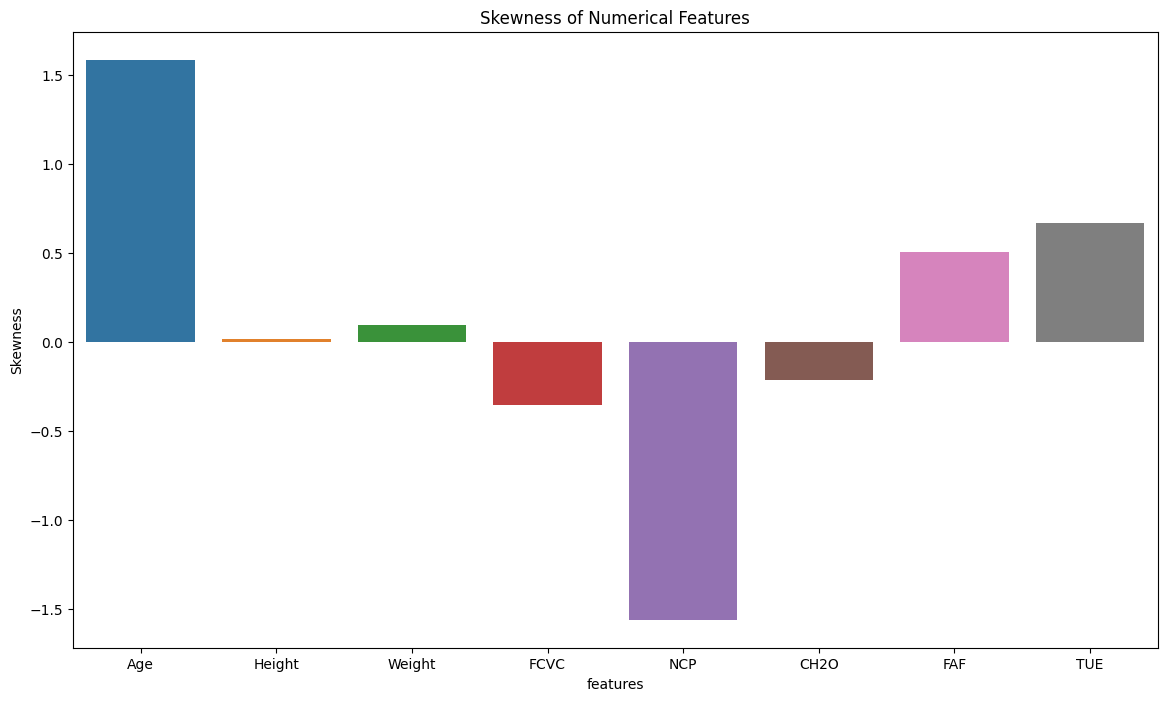

In [309]:
df_num = train_df2.select_dtypes('number')

skewness = df_num.skew()

plt.figure(figsize= (14,8))
sns.barplot(x = skewness.index, y= skewness.values )
plt.title('Skewness of Numerical Features')
plt.xlabel('features')
plt.ylabel('Skewness')
plt.show()

Categorical Features

In [310]:
df_cat = train_df2.select_dtypes(['object','category']) 
df_cat

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,yes,yes,Frequently,no,no,no,Automobile,Normal_Weight
2,Female,yes,yes,Sometimes,no,no,no,Public_Transportation,Insufficient_Weight
3,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
20753,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,no,yes,Frequently,no,no,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,yes,yes,Sometimes,no,no,no,Public_Transportation,Obesity_Type_II
20756,Male,yes,yes,Sometimes,no,no,no,Automobile,Overweight_Level_II


In [311]:
class CategoricalVisualizer:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def visualize_categorical_features(self):
        for column in self.dataframe.columns:
            if self.dataframe[column].dtype == 'object':  
                unique_values = self.dataframe[column].nunique()
                if unique_values < 4:  
                    self.plot_pie_chart(column)
                else:
                    self.plot_count_plot(column)

    def plot_pie_chart(self, column):
        plt.figure(figsize=(6, 6))
        plt.title(f'Pie Chart for {column}')
        self.dataframe[column].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
        plt.ylabel('')
        plt.show()

    def plot_count_plot(self, column):
        plt.figure(figsize=(8, 6))
        plt.title(f'Count Plot for {column}')
        sns.countplot(data=self.dataframe, x=column, order=self.dataframe[column].value_counts().index)
        plt.xticks(rotation=45)
        plt.show()


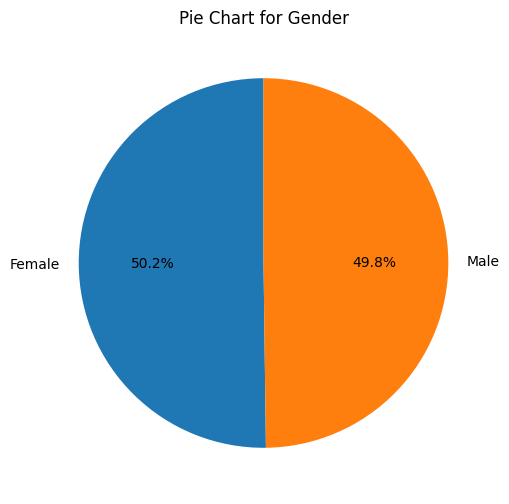

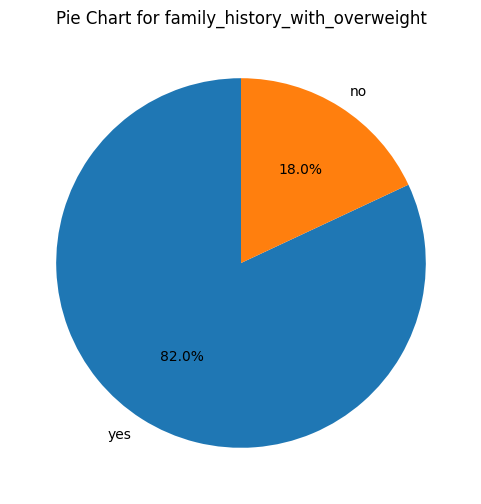

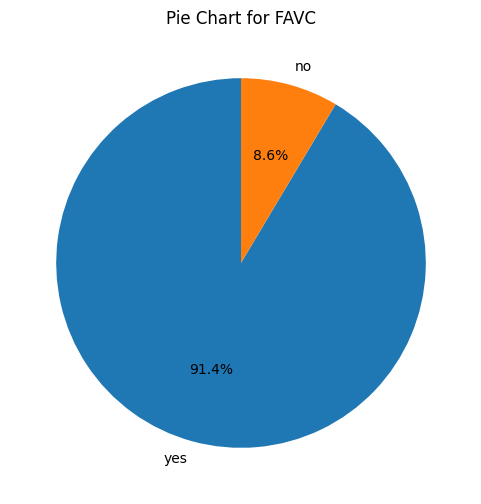

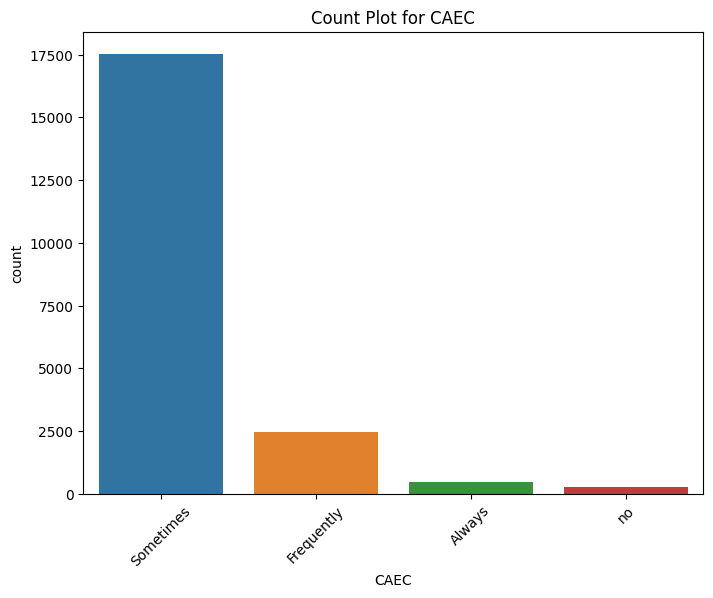

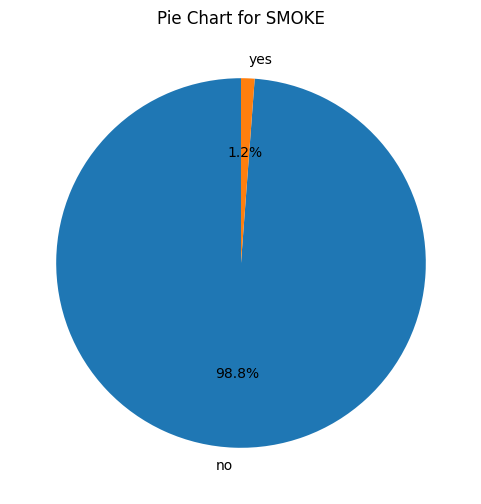

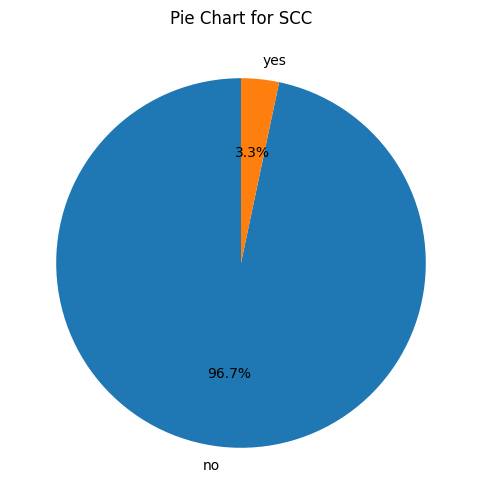

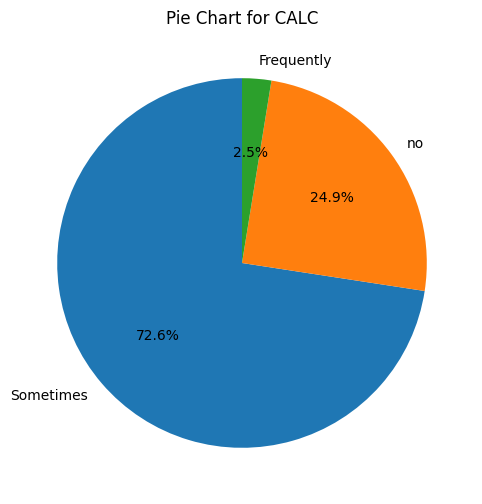

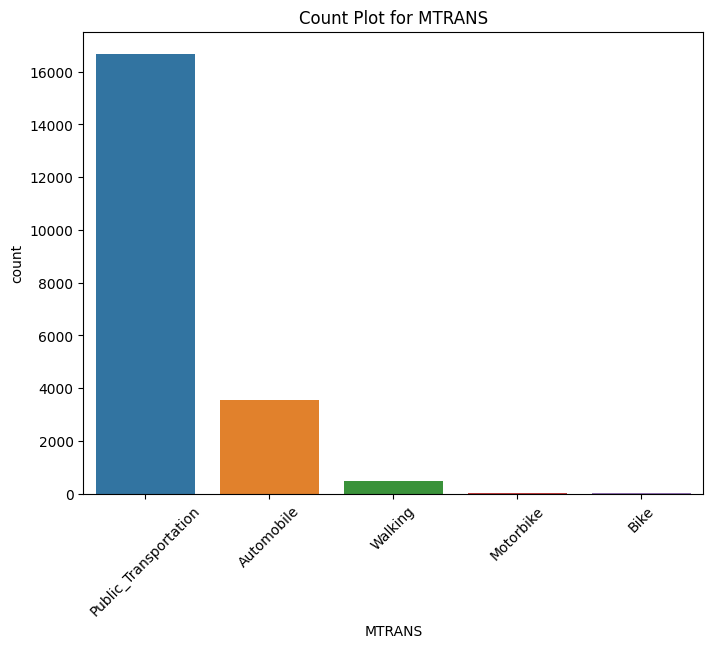

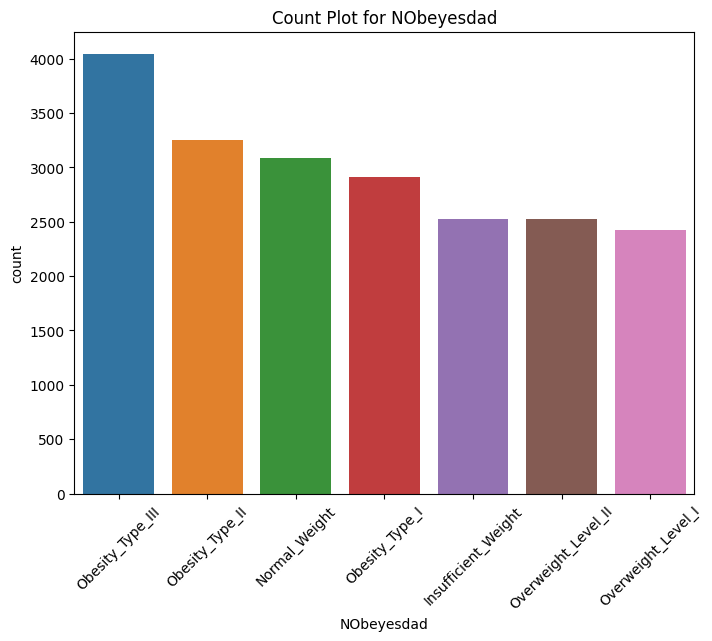

In [312]:
visualizer = CategoricalVisualizer(df_cat)
visualizer.visualize_categorical_features()

In [313]:
X = train_df2.copy()
#y = X.pop('NObeyesdad')

# Label encoding for categoricals
for colname in X.select_dtypes(include=['object','category']).columns:
    X[colname], _ = X[colname].factorize()

In [314]:
X.corr()['NObeyesdad'].sort_values()

FAVC                             -0.201225
family_history_with_overweight   -0.199185
CAEC                             -0.130424
NCP                              -0.128415
FCVC                             -0.093445
CALC                             -0.079481
Gender                           -0.077587
FAF                              -0.061382
TUE                              -0.043260
SCC                              -0.012213
MTRANS                           -0.007690
SMOKE                             0.012804
Height                            0.092731
CH2O                              0.132251
Age                               0.143401
Weight                            0.348173
NObeyesdad                        1.000000
Name: NObeyesdad, dtype: float64

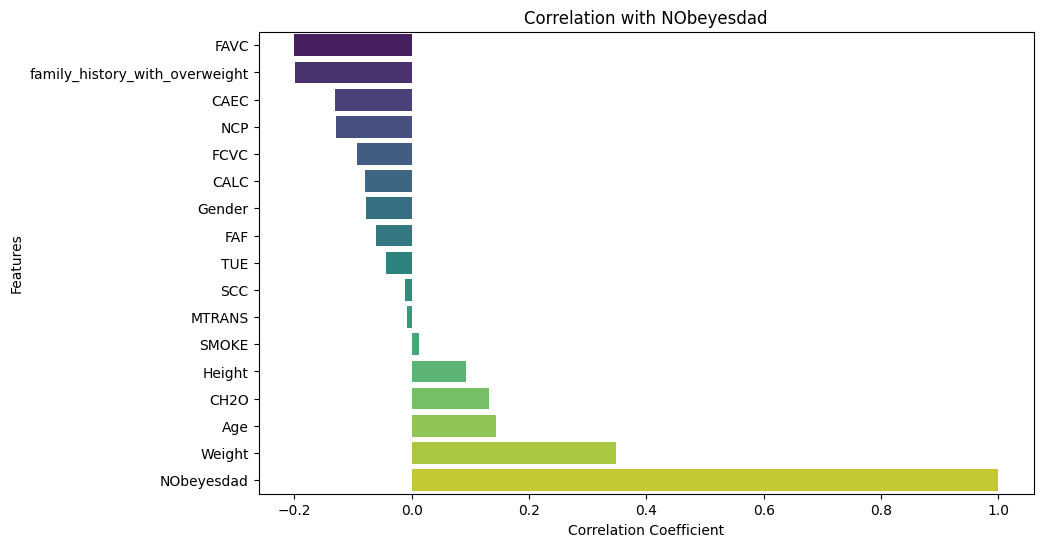

In [315]:
correlation_values = X.corr()['NObeyesdad'].sort_values()

# Plotting the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_values.values, y=correlation_values.index, palette='viridis')
plt.title('Correlation with NObeyesdad')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

# Hypothesis testing for 'Age' vs 'NObeyesdad'

Our hypothesis is that older people tend to get overweight due to reduced participation in physical activities

In [316]:
ageTot = train_df2.groupby('Age')['NObeyesdad'].agg(ageTot = 'count').reset_index() 

In [317]:
ageTot

,Age,ageTot
0,14.000000,5
1,15.000000,3
2,16.000000,109
3,16.093234,4
4,16.120699,1
...,...,...
1698,55.246250,2
1699,55.272573,1
1700,55.493687,1
1701,56.000000,1


In [318]:
# getting all the details in one place
ageProp = train_df2.groupby(['Age','NObeyesdad'])['NObeyesdad'].agg(ageCat ='count').reset_index()

In [319]:
ageProp

,Age,NObeyesdad,ageCat
0,14.000000,Normal_Weight,4
1,14.000000,Obesity_Type_I,1
2,15.000000,Normal_Weight,2
3,15.000000,Overweight_Level_I,1
4,16.000000,Insufficient_Weight,29
...,...,...,...
3813,55.246250,Overweight_Level_II,2
3814,55.272573,Overweight_Level_II,1
3815,55.493687,Overweight_Level_II,1
3816,56.000000,Overweight_Level_II,1


In [320]:
# Merging both the data frames
ageComb = pd.merge(ageProp, ageTot, on=['Age'])
ageComb['ageProp'] = (ageComb.ageCat/ageComb.ageTot)*100

In [321]:
ageComb

,Age,NObeyesdad,ageCat,ageTot,ageProp
0,14.000000,Normal_Weight,4,5,80.000000
1,14.000000,Obesity_Type_I,1,5,20.000000
2,15.000000,Normal_Weight,2,3,66.666667
3,15.000000,Overweight_Level_I,1,3,33.333333
4,16.000000,Insufficient_Weight,29,109,26.605505
...,...,...,...,...,...
3813,55.246250,Overweight_Level_II,2,2,100.000000
3814,55.272573,Overweight_Level_II,1,1,100.000000
3815,55.493687,Overweight_Level_II,1,1,100.000000
3816,56.000000,Overweight_Level_II,1,1,100.000000


In [322]:
alt.Chart(ageComb).mark_line().encode(x='Age', y='ageProp').facet(column='NObeyesdad')

alt.FacetChart(...)

# Hypothesis testing for 'family_history_with_overweight' vs 'NObeyesdad'

In [323]:
# Our hypothesis is that people that have family history with overweight have a tedency to also become overweight

In [324]:
# Getting the total counts under each family_history_with_overweight category
overweightHistoryTot = train_df2.groupby('family_history_with_overweight')['NObeyesdad'].agg(overweightHistoryTot='count').reset_index()
overweightHistoryTot

,family_history_with_overweight,overweightHistoryTot
0,no,3744
1,yes,17014


In [325]:
# Getting all the details in one place
overweightHistoryProp = train_df2.groupby(['family_history_with_overweight', 'NObeyesdad'])['NObeyesdad']\
                  .agg(overweightHistoryCat='count').reset_index()

overweightHistoryProp

,family_history_with_overweight,NObeyesdad,overweightHistoryCat
0,no,Insufficient_Weight,1449
1,no,Normal_Weight,1292
2,no,Obesity_Type_I,48
3,no,Obesity_Type_II,5
4,no,Obesity_Type_III,1
5,no,Overweight_Level_I,756
6,no,Overweight_Level_II,193
7,yes,Insufficient_Weight,1074
8,yes,Normal_Weight,1790
9,yes,Obesity_Type_I,2862


In [326]:
# Merging both data frames
overweightHistoryComb = pd.merge(overweightHistoryProp, overweightHistoryTot, on=['family_history_with_overweight'])

overweightHistoryComb['overweightHistoryProp'] = (overweightHistoryComb.overweightHistoryCat/overweightHistoryComb.overweightHistoryTot)*100

In [327]:
overweightHistoryComb

,family_history_with_overweight,NObeyesdad,overweightHistoryCat,overweightHistoryTot,overweightHistoryProp
0,no,Insufficient_Weight,1449,3744,38.701923
1,no,Normal_Weight,1292,3744,34.508547
2,no,Obesity_Type_I,48,3744,1.282051
3,no,Obesity_Type_II,5,3744,0.133547
4,no,Obesity_Type_III,1,3744,0.026709
5,no,Overweight_Level_I,756,3744,20.192308
6,no,Overweight_Level_II,193,3744,5.154915
7,yes,Insufficient_Weight,1074,17014,6.312449
8,yes,Normal_Weight,1790,17014,10.520748
9,yes,Obesity_Type_I,2862,17014,16.821441


In [328]:
train_df2['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [329]:
overweightHistoryOverweight_Level_II = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Overweight_Level_II']
overweightHistoryNormal_Weight = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Normal_Weight']
overweightHistoryInsufficient_Weight = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Insufficient_Weight']
overweightHistoryObesity_Type_III = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Obesity_Type_III']
overweightHistoryObesity_Type_II = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Obesity_Type_II']
overweightHistoryOverweight_Level_I = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Overweight_Level_I']
overweightHistoryObesity_Type_I = overweightHistoryComb[overweightHistoryComb['NObeyesdad'] == 'Obesity_Type_I']


In [330]:
xlabels = overweightHistoryTot['family_history_with_overweight'].nunique()

In [331]:
xlabels

2

In [332]:
overweightHistoryNormal_Weight

,family_history_with_overweight,NObeyesdad,overweightHistoryCat,overweightHistoryTot,overweightHistoryProp
1,no,Normal_Weight,1292,3744,34.508547
8,yes,Normal_Weight,1790,17014,10.520748


In [333]:
overweightHistoryInsufficient_Weight = overweightHistoryInsufficient_Weight['overweightHistoryProp'].unique()
overweightHistoryNormal_Weight = overweightHistoryNormal_Weight['overweightHistoryProp'].unique()
overweightHistoryOverweight_Level_I = overweightHistoryOverweight_Level_I['overweightHistoryProp'].unique()
overweightHistoryOverweight_Level_II = overweightHistoryOverweight_Level_II['overweightHistoryProp'].unique()
overweightHistoryObesity_Type_I = overweightHistoryObesity_Type_I['overweightHistoryProp'].unique()
overweightHistoryObesity_Type_II = overweightHistoryObesity_Type_II['overweightHistoryProp'].unique()
overweightHistoryObesity_Type_III = overweightHistoryObesity_Type_III['overweightHistoryProp'].unique()

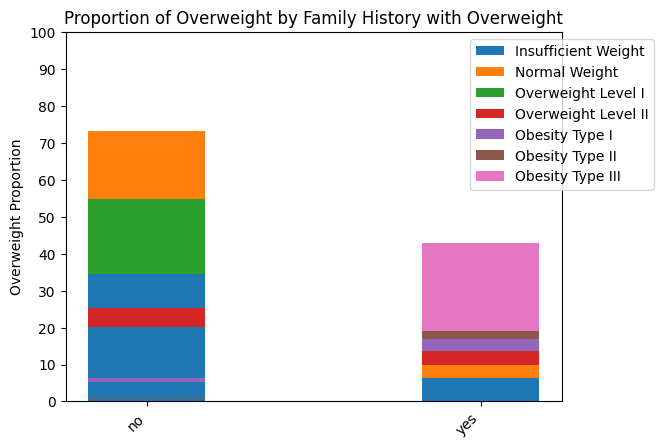

In [334]:
width = 0.35
# Getting the plots
p1 = plt.bar(ind, overweightHistoryInsufficient_Weight, width)
p2 = plt.bar(ind, overweightHistoryNormal_Weight, width, bottom=overweightHistoryInsufficient_Weight)
p3 = plt.bar(ind, overweightHistoryOverweight_Level_I, width, bottom=overweightHistoryNormal_Weight)
p4 = plt.bar(ind, overweightHistoryOverweight_Level_II, width, bottom=overweightHistoryOverweight_Level_I)
p5 = plt.bar(ind, overweightHistoryObesity_Type_I, width, bottom=overweightHistoryOverweight_Level_II)
p6 = plt.bar(ind, overweightHistoryObesity_Type_II, width, bottom=overweightHistoryObesity_Type_I)
p7 = plt.bar(ind, overweightHistoryObesity_Type_III, width, bottom=overweightHistoryObesity_Type_II)

plt.ylabel('Overweight Proportion')
plt.title('Proportion of Overweight by Family History with Overweight')
plt.xticks(ind, overweightHistoryTot['family_history_with_overweight'].unique())
plt.yticks(np.arange(0, 101, 10))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]),
           ('Insufficient Weight', 'Normal Weight', 'Overweight Level I', 'Overweight Level II',
            'Obesity Type I', 'Obesity Type II', 'Obesity Type III'),
           loc='upper right', bbox_to_anchor=(1.2, 1))
# To rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

plt.show()

From the stacked bar chart above, majority of people with a family history with overweight have Obesity Type III

# Classification Model

In [335]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [336]:
X = train_df2.copy() 
y = X.pop('NObeyesdad') 

In [337]:
X_cat = X.select_dtypes(include = ['object','category'])

In [338]:
X_final = pd.concat([X_num,X_cat], axis=1)

In [339]:
X_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20758 non-null  float64
 1   Height                          20758 non-null  float64
 2   Weight                          20758 non-null  float64
 3   FCVC                            20758 non-null  float64
 4   NCP                             20758 non-null  float64
 5   CH2O                            20758 non-null  float64
 6   FAF                             20758 non-null  float64
 7   TUE                             20758 non-null  float64
 8   Gender                          20758 non-null  object 
 9   family_history_with_overweight  20758 non-null  object 
 10  FAVC                            20758 non-null  object 
 11  CAEC                            20758 non-null  object 
 12  SMOKE                           

In [340]:
# Label encoding for categoricals
for colname in X_final.select_dtypes(include=['object','category']).columns:
    X_final[colname], _ = X_final[colname].factorize()

In [341]:
X_train, X_val, y_train, y_val = train_test_split(X_final,y, test_size =0.2, random_state=1)

In [342]:
X_val.shape

(4152, 16)

In [343]:
rfModel = RandomForestClassifier(random_state= 1, n_estimators =500)

In [344]:
rfModel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=1)

In [345]:
valPred = rfModel.predict(X_val)

In [346]:
from sklearn.metrics import confusion_matrix, classification_report

In [347]:
confusion_matrix(valPred, y_val)

array([[479,  36,   2,   0,   0,   5,   0],
       [ 34, 523,   1,   0,   0,  44,   9],
       [  0,   0, 515,  11,   2,   8,  41],
       [  0,   0,  22, 597,   0,   0,   4],
       [  0,   0,   0,   0, 868,   0,   0],
       [  1,  28,  12,   0,   0, 354,  38],
       [  0,   5,  39,   5,   0,  65, 404]])

In [348]:
print(classification_report(valPred,y_val))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.92      0.92       522
      Normal_Weight       0.88      0.86      0.87       611
     Obesity_Type_I       0.87      0.89      0.88       577
    Obesity_Type_II       0.97      0.96      0.97       623
   Obesity_Type_III       1.00      1.00      1.00       868
 Overweight_Level_I       0.74      0.82      0.78       433
Overweight_Level_II       0.81      0.78      0.80       518

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



In [349]:
dict1 = {'Overweight_Level_II': 3, 'Normal_Weight': 1, 'Insufficient_Weight': 0,
       'Obesity_Type_III':6, 'Obesity_Type_II':5, 'Overweight_Level_I': 2,
       'Obesity_Type_I': 4}

In [350]:
train_df3 = train_df2.copy()

In [351]:
train_df3['NObeyesdad'] = train_df3['NObeyesdad'].replace(dict1)

/tmp/ipykernel_33/2026572446.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df3['NObeyesdad'] = train_df3['NObeyesdad'].replace(dict1)


In [352]:
train_df3

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,3
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,1
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,0
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,6
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,5
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,0
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,5
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,3


In [353]:
X = train_df3.copy()
y = X.pop('NObeyesdad')

for colname in X.select_dtypes(include=['object','category']).columns:
    X[colname], _ = X[colname].factorize()

In [354]:
X_train2, X_val2, y_train2, y_val2 = train_test_split(X,y,random_state =1)

In [355]:
from xgboost import XGBClassifier

In [356]:
#xgbModel = XGBClassifier(random_state=1)
xgbModel = XGBClassifier(n_estimators=500, learning_rate=0.05, n_jobs=4)

In [357]:
xgbModel.fit(X_train2, y_train2)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=4,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [358]:
valPred2 = xgbModel.predict(X_val2)

In [359]:
print(classification_report(y_val2, valPred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       665
           1       0.89      0.88      0.88       762
           2       0.82      0.78      0.80       597
           3       0.79      0.81      0.80       613
           4       0.89      0.89      0.89       725
           5       0.97      0.97      0.97       773
           6       1.00      1.00      1.00      1055

    accuracy                           0.91      5190
   macro avg       0.90      0.90      0.90      5190
weighted avg       0.91      0.91      0.91      5190



# Submission

In [360]:
test_df = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [361]:
test_df1 = test_df.copy()

In [362]:
id = test_df1.pop('id')
#test_df.drop(columns=['id'], inplace= True)

In [363]:
test_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          13840 non-null  object 
 1   Age                             13840 non-null  float64
 2   Height                          13840 non-null  float64
 3   Weight                          13840 non-null  float64
 4   family_history_with_overweight  13840 non-null  object 
 5   FAVC                            13840 non-null  object 
 6   FCVC                            13840 non-null  float64
 7   NCP                             13840 non-null  float64
 8   CAEC                            13840 non-null  object 
 9   SMOKE                           13840 non-null  object 
 10  CH2O                            13840 non-null  float64
 11  SCC                             13840 non-null  object 
 12  FAF                             

In [364]:
for colname in test_df1.select_dtypes(include=['object','category']).columns:
    test_df1[colname], _ = test_df1[colname].factorize()

In [365]:
type(id)

pandas.core.series.Series

In [366]:
train_df2['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

In [367]:
import pandas as pd

# Assuming y_pred is your predicted labels from the model
y_pred = xgbModel.predict(test_df1)

# Assuming map_target is your mapping dictionary
map_target = {
    3: 'Overweight_Level_II',
    1: 'Normal_Weight',
    0: 'Insufficient_Weight',
    6: 'Obesity_Type_III',
    5: 'Obesity_Type_II',
    2: 'Overweight_Level_I',
    4: 'Obesity_Type_I'
}

# Reverse map the predicted labels back to class names
target_class = [map_target[label] for label in y_pred]

# Create a DataFrame with 'id' and 'NObeyesdad'
test_predictions = pd.DataFrame({'id': id, 'NObeyesdad': target_class})

# Print the first few rows of the output DataFrame
print(test_predictions.head())


      id          NObeyesdad
0  20758     Obesity_Type_II
1  20759  Overweight_Level_I
2  20760    Obesity_Type_III
3  20761      Obesity_Type_I
4  20762    Obesity_Type_III


In [368]:
test_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          13840 non-null  int64 
 1   NObeyesdad  13840 non-null  object
dtypes: int64(1), object(1)
memory usage: 216.4+ KB


In [369]:
test_predictions.to_csv("submission.csv",index=False)

In [370]:
test_predictions

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [371]:
submission = pd.read_csv('/kaggle/input/playground-series-s4e2/sample_submission.csv')
submission

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


Thank you for exploring this notebook! If you enjoyed it and found value in the content, please consider giving it an upvote ⬆️. Your support means a lot to me and encourages me to create more helpful notebooks.